# Simple Data analysis in Jupyter note book

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

tqdm.pandas()
%reload_ext autoreload
%autoreload 2
%reload_ext google.colab.data_table
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

In [ ]:
# !unzip data.zip

In [ ]:
# import glob
files = glob.glob('/content/*.xlsx')
files.sort()
years = {x:int(Path(x).stem.split('_')[1]) for x in files}

## Section 1

In [ ]:
def temp(filename):
  df = pd.read_excel(filename)
  df.columns = ['x1','industry','x3','x4','x5','x6','wales']
  df = df[~pd.notnull(df.x3)]
  df = df[['industry','wales']]
  df = df.iloc[2:].reset_index(drop=True)
  industry_labels = {
      'Agriculture, forestry and fishing ': 'Agriculture',
      'Production ': 'Production',
      'Construction ': 'Construction', 
      'Wholesale, retail, transport, hotels and food ': 'Retail',
      'Information and communication ': 'ICT',
      'Finance and insurance activities ': 'Finance', 
      'Real estate activities ': 'Real_Estate',
      'Professional, scientific and technical activities; administrative and support service activities ': 'Professional_Service',
      'Public administration, defence, education and health ': 'Public_Adminstration',
      'Other service activities ': 'Other_Service'}
  df = df.replace({'industry': industry_labels})
  df['year'] = years[filename]
  return df

df = pd.DataFrame(columns=['industry','wales','year'])
for fpath in files:
  df = df.append(temp(fpath))#.append(temp(files[1]))
df['wales'] = df['wales'].astype('int')
df['year'] = df['year'].astype('int')
df = pd.pivot_table(df, values = 'wales', index=['industry'], columns = 'year').reset_index()
df = df.set_index('industry').reindex(list(industry_labels.values())).iloc[:, ::-1].reset_index()
df

year,industry,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,Agriculture,36100,38200,37700,39100,37900,37100,34200,32900,32200,31000
1,Production,158600,149800,156700,182200,179500,175700,180600,189300,199900,204200
2,Construction,90000,93200,96600,108100,105500,107200,95900,92900,86400,87200
3,Retail,343100,344500,345400,356200,359300,352200,356100,353000,346300,340300
4,ICT,26400,27900,27800,27700,28500,28200,27900,27100,26300,25600
5,Finance,33200,29800,33800,34900,34600,34400,31300,28700,28000,27200
6,Real_Estate,17600,14600,13500,15300,15100,14900,14000,12700,12700,11800
7,Professional_Service,143600,145800,144800,139100,138500,136800,127900,114400,113600,109200
8,Public_Adminstration,425600,418600,415600,409900,405200,395900,394200,389700,386600,365900
9,Other_Service,72400,68000,64200,63700,69700,69600,69800,67900,63900,64100


Comment 1: 

## Section 2

2.1

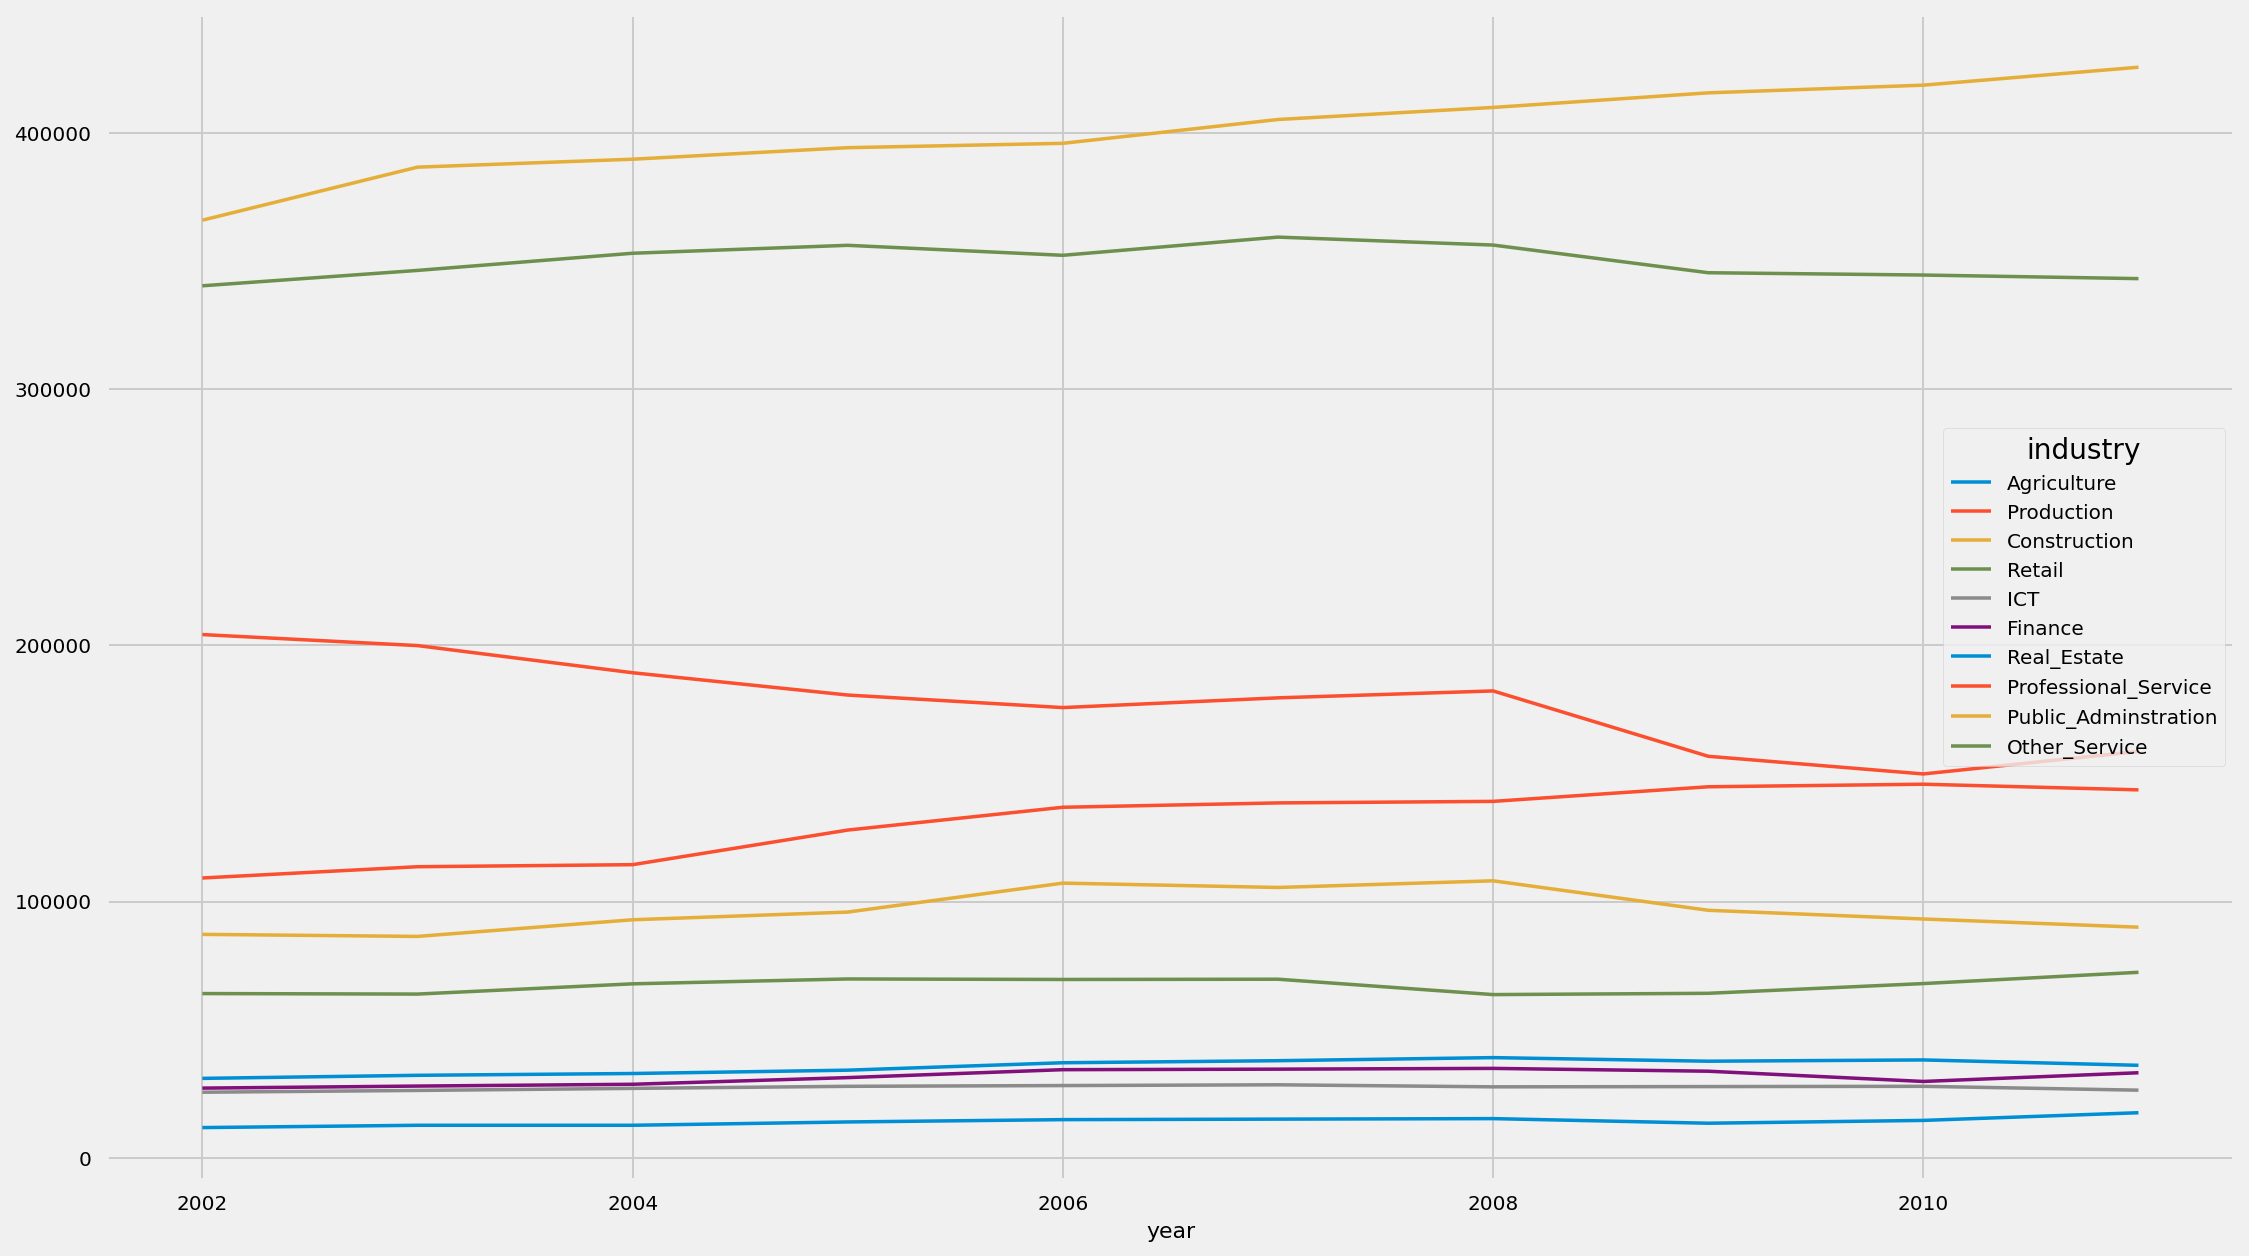

In [ ]:
# fig=plt.figure(figsize=(10,30))
df.set_index('industry').T.plot(kind='line', figsize=(17, 10))
plt.show()

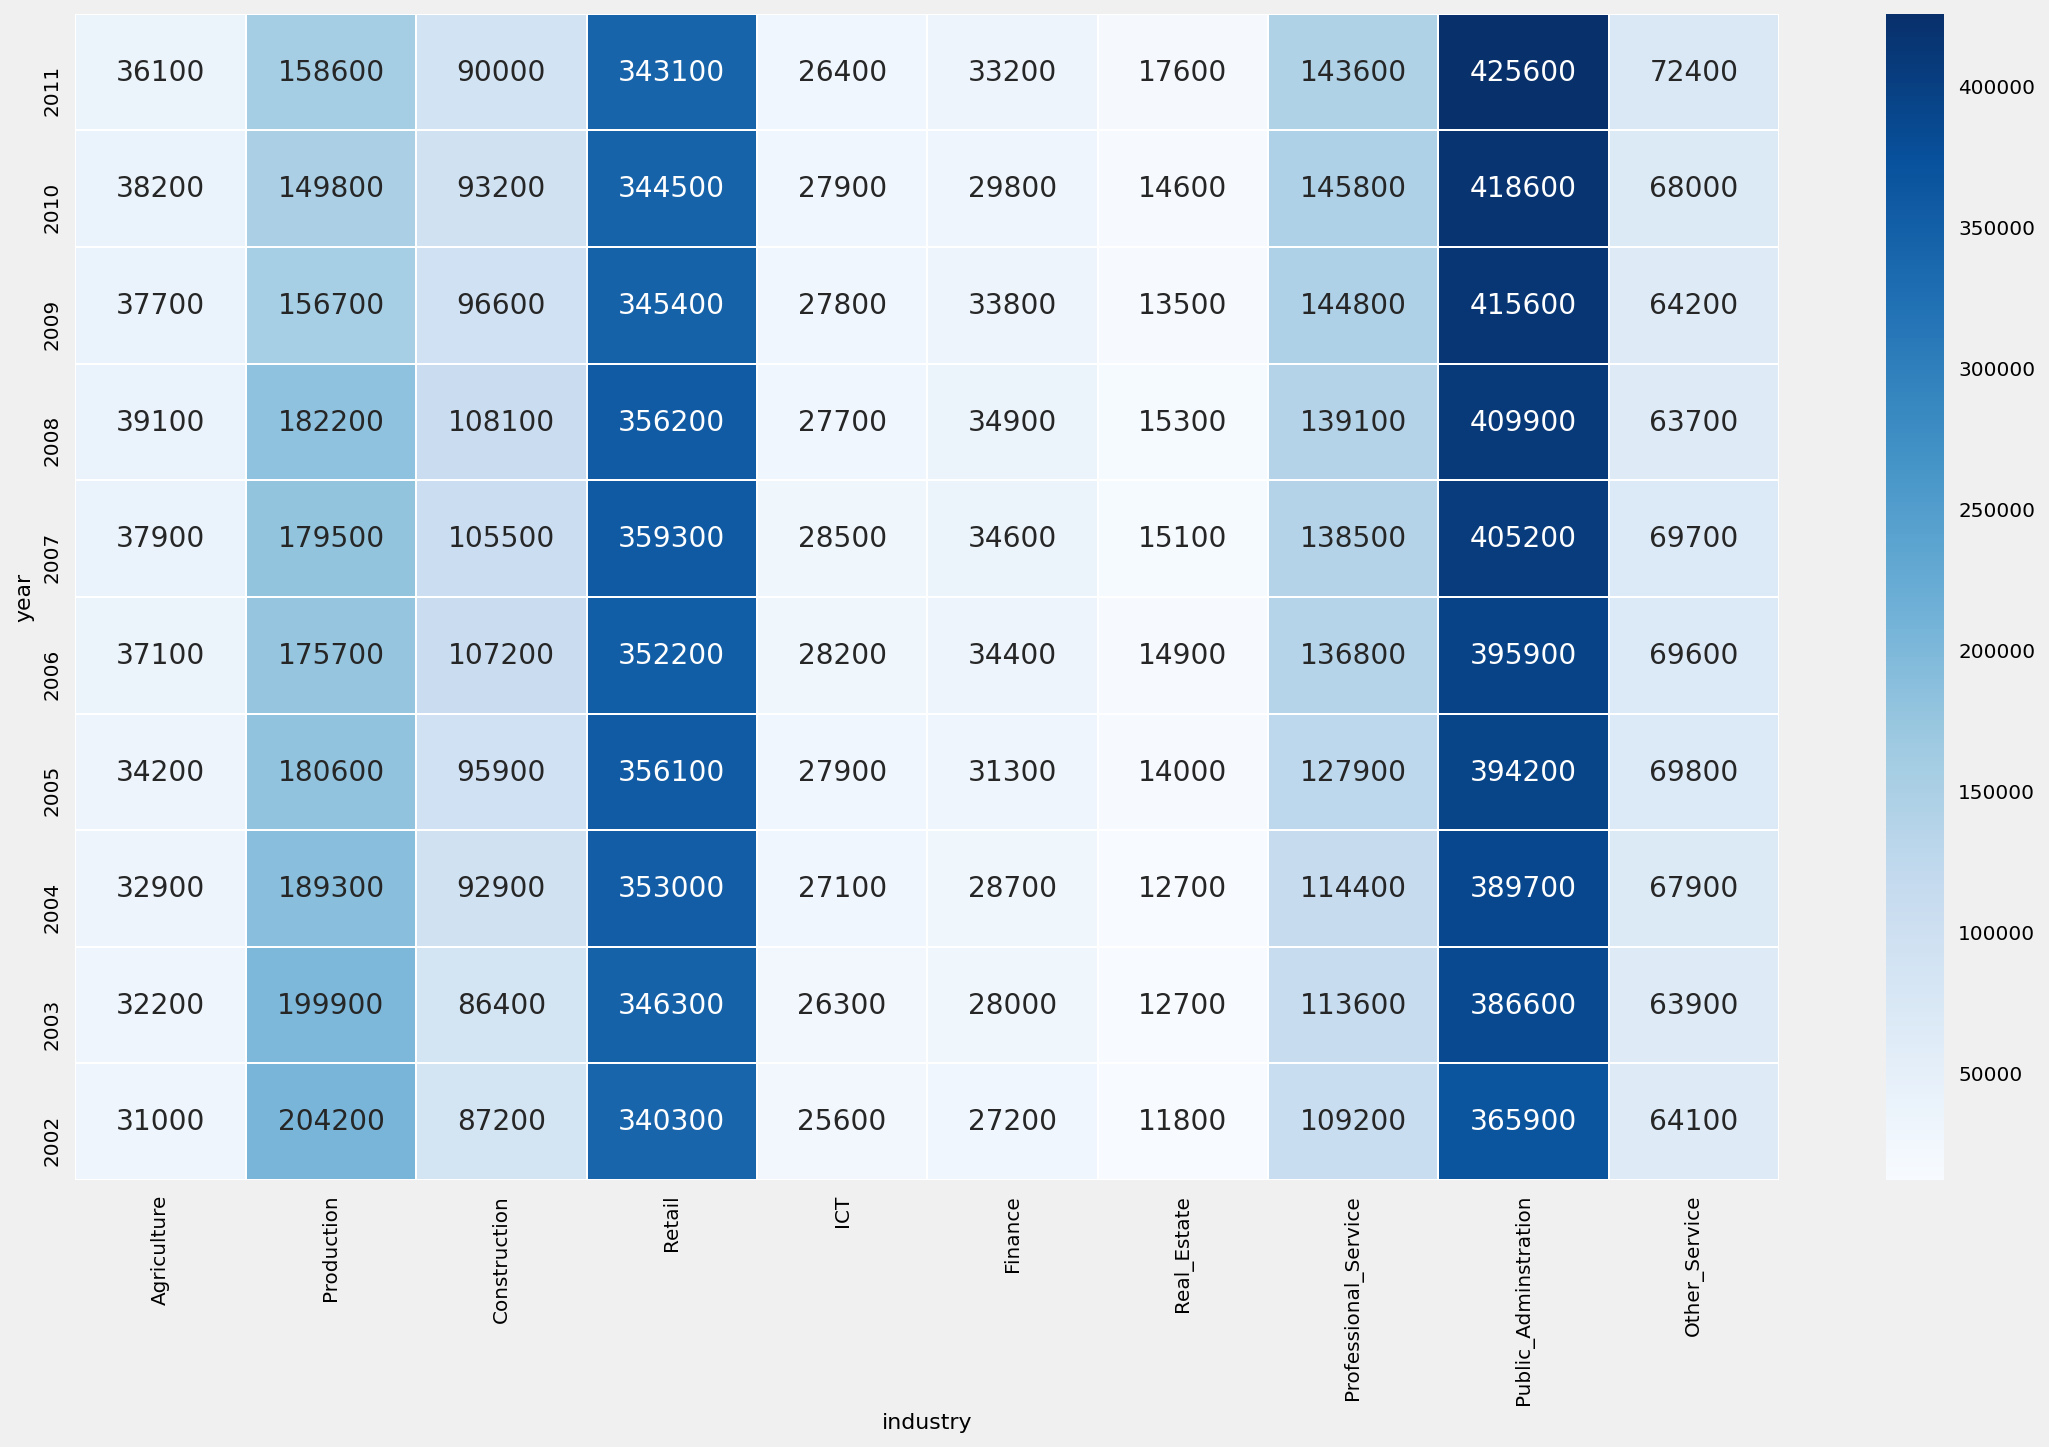

In [ ]:
figure, axes = plt.subplots(figsize=(17, 10))
sns.heatmap(df.set_index('industry').T, annot=True, fmt="d", linewidths=.5, ax=axes, cmap='Blues')

Comment 2.1: 

2.2

In [ ]:
dfx = df.set_index('industry').T
dfx

industry,Agriculture,Production,Construction,Retail,ICT,Finance,Real_Estate,Professional_Service,Public_Adminstration,Other_Service
year,,,,,,,,,,
2011,36100,158600,90000,343100,26400,33200,17600,143600,425600,72400
2010,38200,149800,93200,344500,27900,29800,14600,145800,418600,68000
2009,37700,156700,96600,345400,27800,33800,13500,144800,415600,64200
2008,39100,182200,108100,356200,27700,34900,15300,139100,409900,63700
2007,37900,179500,105500,359300,28500,34600,15100,138500,405200,69700
2006,37100,175700,107200,352200,28200,34400,14900,136800,395900,69600
2005,34200,180600,95900,356100,27900,31300,14000,127900,394200,69800
2004,32900,189300,92900,353000,27100,28700,12700,114400,389700,67900
2003,32200,199900,86400,346300,26300,28000,12700,113600,386600,63900


In [ ]:
dft = df.set_index('industry').copy()
dft['growth'] = (dft[2011] - dft[2002])*100/dft[2002]
dft

year,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,growth
industry,,,,,,,,,,,
Agriculture,36100,38200,37700,39100,37900,37100,34200,32900,32200,31000,16.451613
Production,158600,149800,156700,182200,179500,175700,180600,189300,199900,204200,-22.331048
Construction,90000,93200,96600,108100,105500,107200,95900,92900,86400,87200,3.211009
Retail,343100,344500,345400,356200,359300,352200,356100,353000,346300,340300,0.822803
ICT,26400,27900,27800,27700,28500,28200,27900,27100,26300,25600,3.125000
Finance,33200,29800,33800,34900,34600,34400,31300,28700,28000,27200,22.058824
Real_Estate,17600,14600,13500,15300,15100,14900,14000,12700,12700,11800,49.152542
Professional_Service,143600,145800,144800,139100,138500,136800,127900,114400,113600,109200,31.501832
Public_Adminstration,425600,418600,415600,409900,405200,395900,394200,389700,386600,365900,16.315933


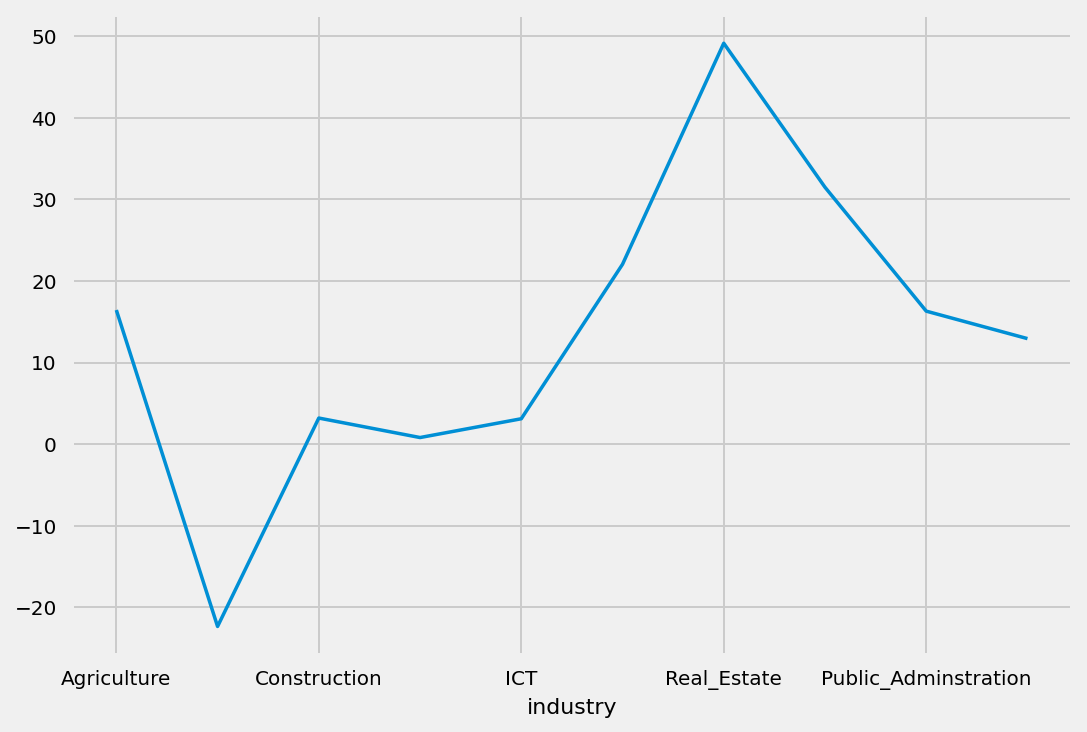

In [ ]:
dft.growth.plot()

Comment 2.2: 

2.3

In [ ]:
dfx['Total'] = dfx.sum(axis=1)
dfx

industry,Agriculture,Production,Construction,Retail,ICT,Finance,Real_Estate,Professional_Service,Public_Adminstration,Other_Service,Total
year,,,,,,,,,,,
2011,36100,158600,90000,343100,26400,33200,17600,143600,425600,72400,1346600
2010,38200,149800,93200,344500,27900,29800,14600,145800,418600,68000,1330400
2009,37700,156700,96600,345400,27800,33800,13500,144800,415600,64200,1336100
2008,39100,182200,108100,356200,27700,34900,15300,139100,409900,63700,1376200
2007,37900,179500,105500,359300,28500,34600,15100,138500,405200,69700,1373800
2006,37100,175700,107200,352200,28200,34400,14900,136800,395900,69600,1352000
2005,34200,180600,95900,356100,27900,31300,14000,127900,394200,69800,1331900
2004,32900,189300,92900,353000,27100,28700,12700,114400,389700,67900,1308600
2003,32200,199900,86400,346300,26300,28000,12700,113600,386600,63900,1295900


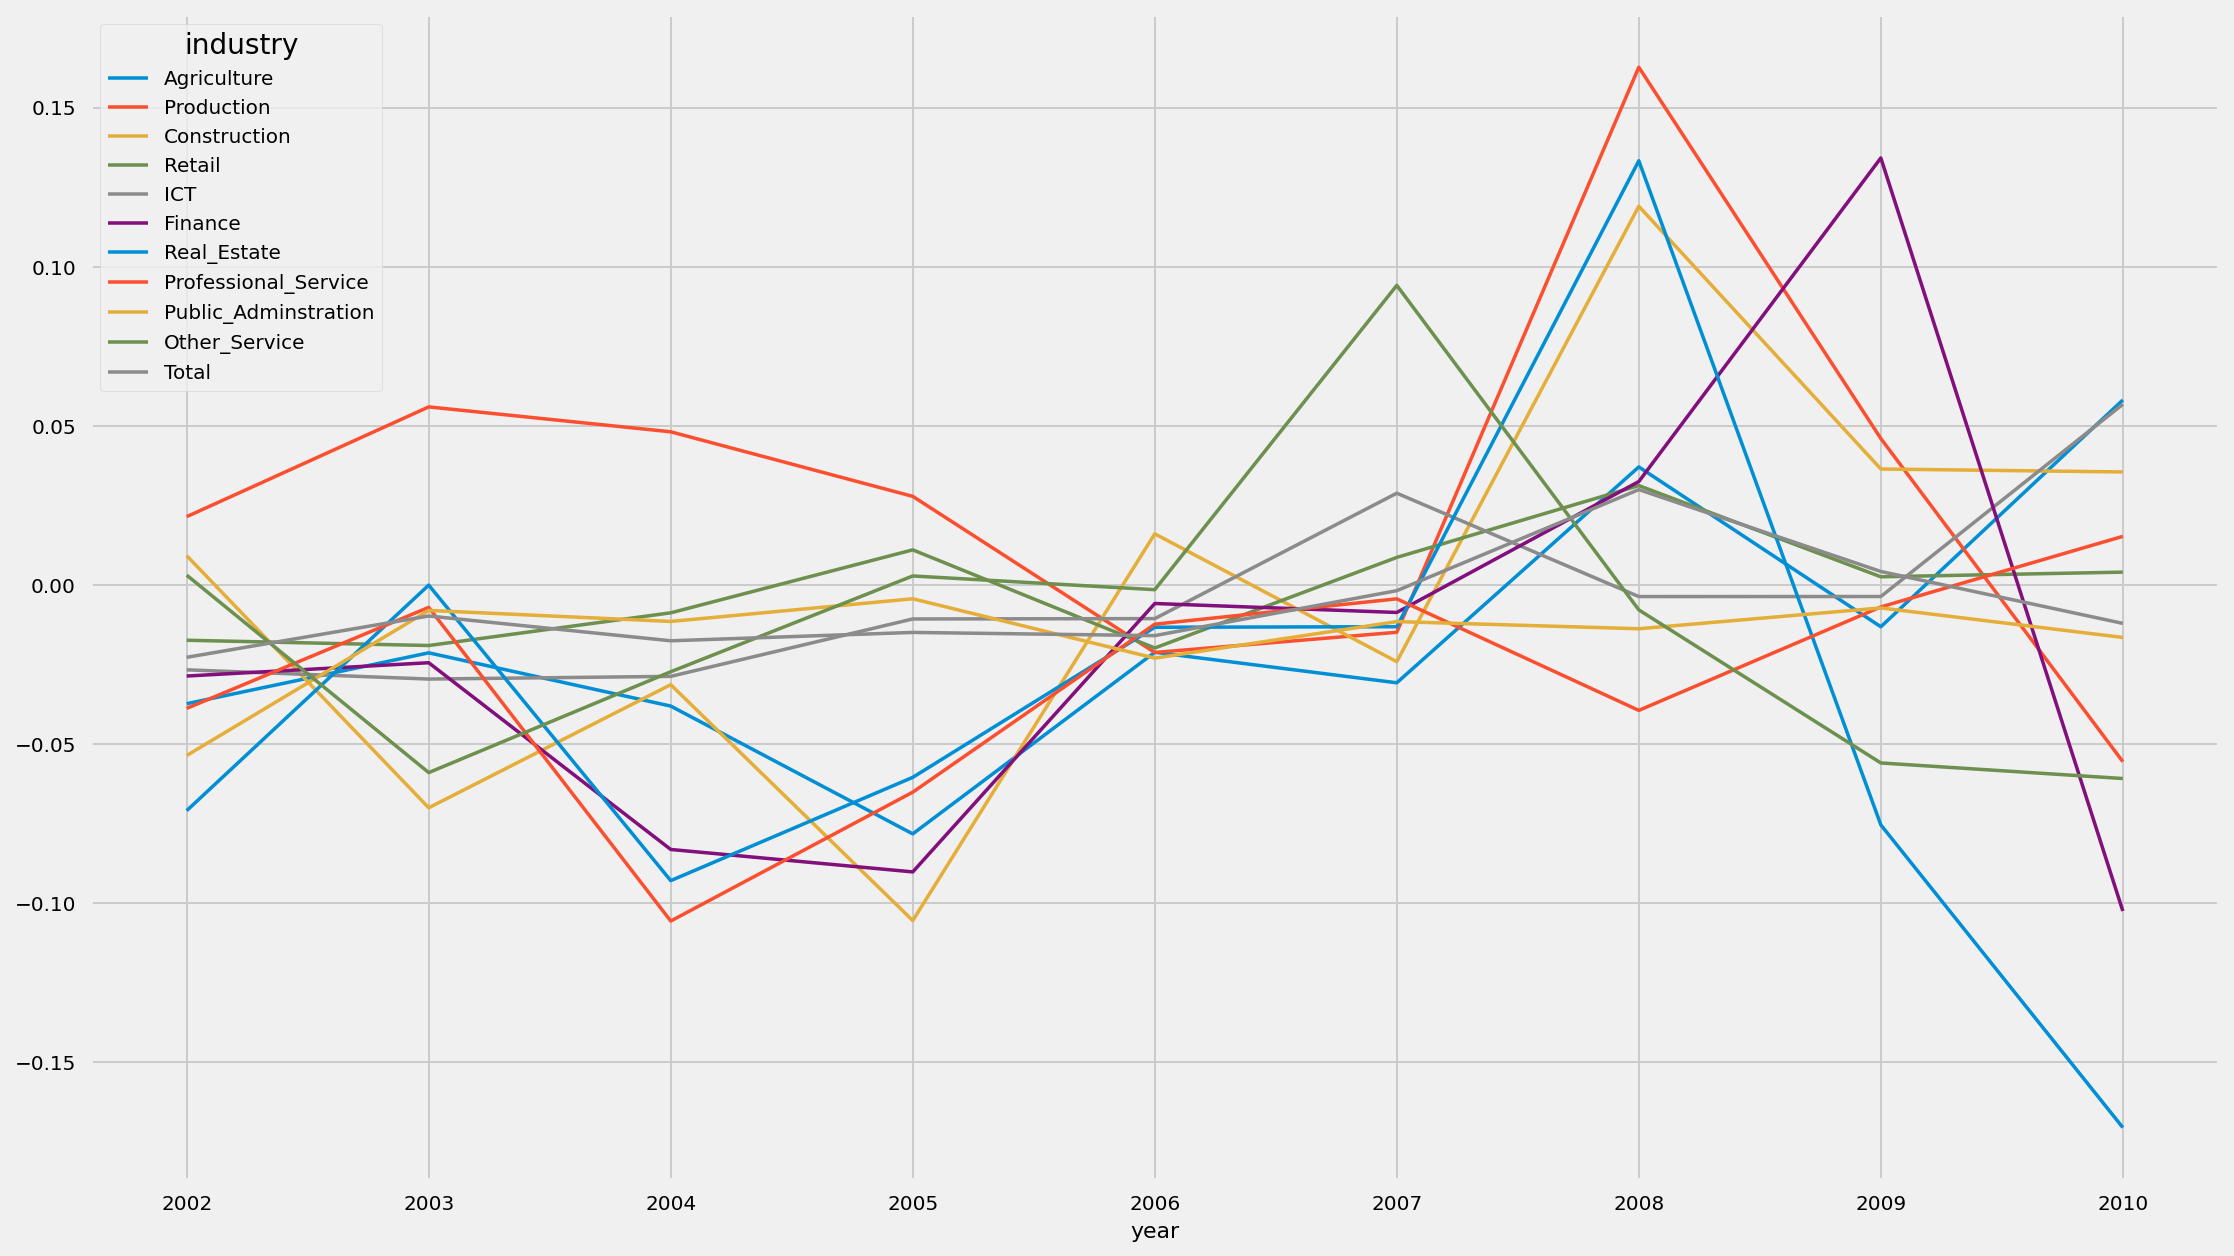

In [ ]:
dfx.pct_change().plot(kind='line', figsize=(17, 10))

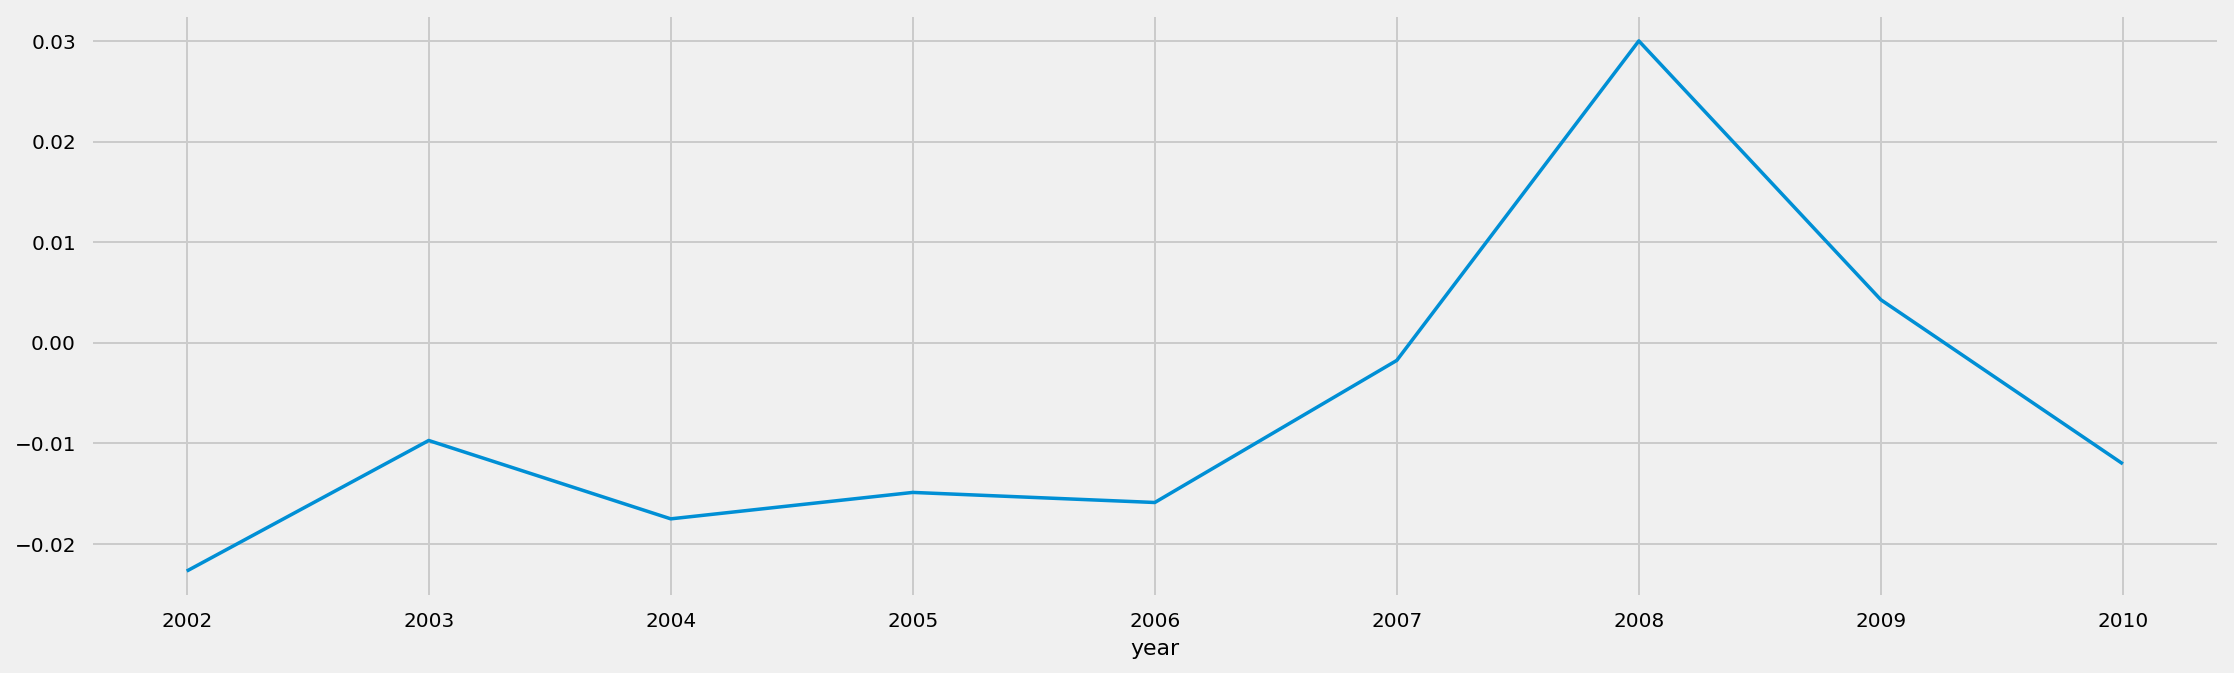

In [ ]:
dfx.Total.pct_change().plot(kind='line', figsize=(17, 5))

Comment 2.3


## Section 4

4.1

In [ ]:
dfx.loc['Average'] = dfx.mean(axis=0)
dfx

industry,Agriculture,Production,Construction,Retail,ICT,Finance,Real_Estate,Professional_Service,Public_Adminstration,Other_Service,Total
year,,,,,,,,,,,
2011,36100.0,158600.0,90000.0,343100.0,26400.0,33200.0,17600.0,143600.0,425600.0,72400.0,1346600.0
2010,38200.0,149800.0,93200.0,344500.0,27900.0,29800.0,14600.0,145800.0,418600.0,68000.0,1330400.0
2009,37700.0,156700.0,96600.0,345400.0,27800.0,33800.0,13500.0,144800.0,415600.0,64200.0,1336100.0
2008,39100.0,182200.0,108100.0,356200.0,27700.0,34900.0,15300.0,139100.0,409900.0,63700.0,1376200.0
2007,37900.0,179500.0,105500.0,359300.0,28500.0,34600.0,15100.0,138500.0,405200.0,69700.0,1373800.0
2006,37100.0,175700.0,107200.0,352200.0,28200.0,34400.0,14900.0,136800.0,395900.0,69600.0,1352000.0
2005,34200.0,180600.0,95900.0,356100.0,27900.0,31300.0,14000.0,127900.0,394200.0,69800.0,1331900.0
2004,32900.0,189300.0,92900.0,353000.0,27100.0,28700.0,12700.0,114400.0,389700.0,67900.0,1308600.0
2003,32200.0,199900.0,86400.0,346300.0,26300.0,28000.0,12700.0,113600.0,386600.0,63900.0,1295900.0


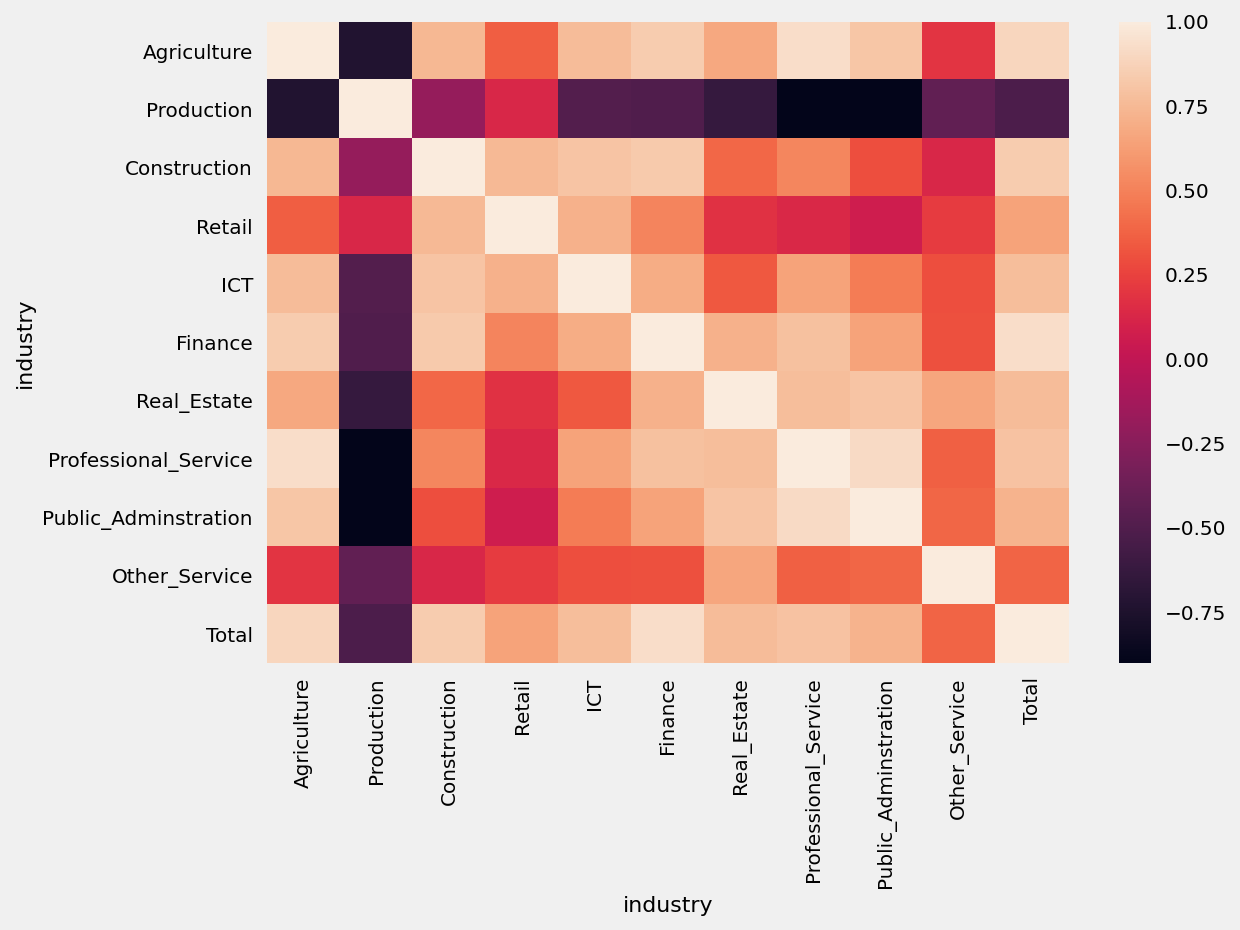

In [ ]:
sns.heatmap(dfx.corr())

Comment 4.1: 

4.2

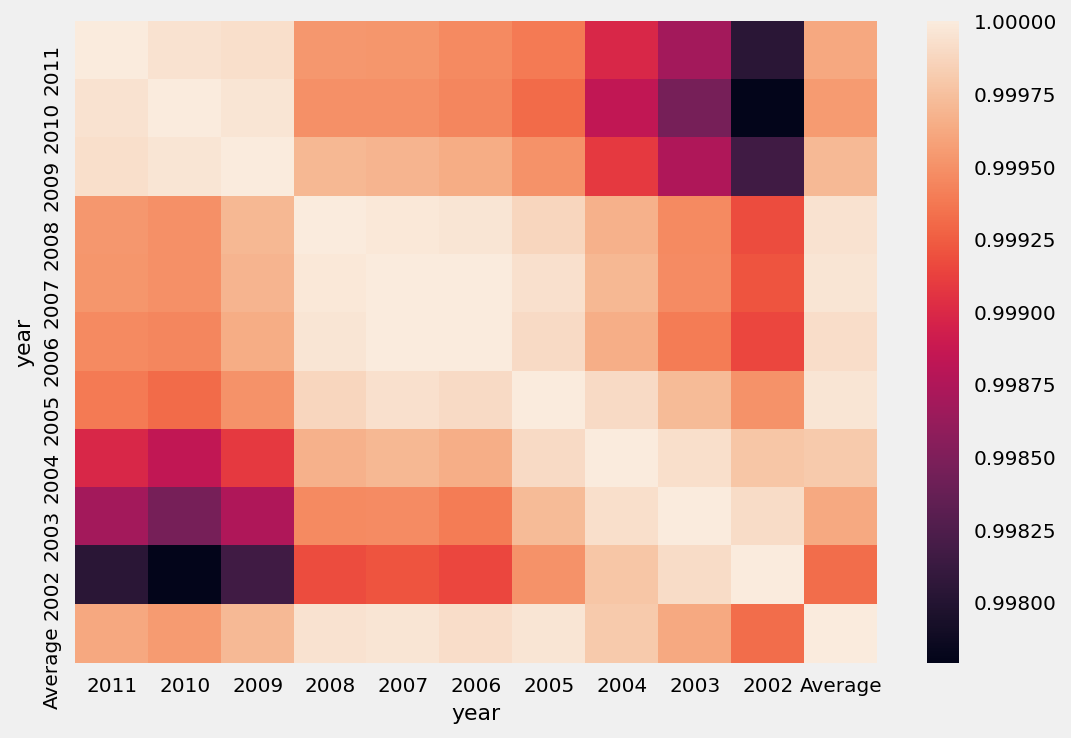

In [ ]:
sns.heatmap(dfx.T.corr())

Comment 4.2: 

## Section 3

In [ ]:
xx = dfxpct.copy().reset_index(); xx.columns
xx = pd.melt(xx, id_vars=['year'], var_name='Name').fillna(0).round(2)
xx.head()

,year,Name,value
0,2011,Agriculture,0.00
1,2010,Agriculture,0.06
2,2009,Agriculture,-0.01
3,2008,Agriculture,0.04
4,2007,Agriculture,-0.03


In [ ]:
# !pip install -q plotly==4.2.1
# import plotly.express as px
# dfxpct = dfx.pct_change() 
# fig = px.scatter(x=dfxpct.index, y=dfxpct['Production'].values)
fig = px.scatter(xx, x='year', y='value', color='Name')
fig.show()

Comment 3:

## Section 5

In [ ]:
dfx = df.set_index('industry').T
dfx['Total'] = dfx.sum(axis=1)
xx = dfx.pct_change()
best_performing_year = xx.index[xx.Total.argmax()]
worst_performing_year = xx.index[xx.Total.argmin()]

In [ ]:
best_performing_year_data = dfx.T[best_performing_year]
worst_performing_year_data = dfx.T[worst_performing_year]

In [ ]:
xz = worst_performing_year_data.reset_index().merge(best_performing_year_data.reset_index()).set_index('industry')

5.1

In [ ]:
from sklearn.cluster import KMeans
kmeans_2n = KMeans(n_clusters=2).fit(xz)
kmeans_3n = KMeans(n_clusters=3).fit(xz)
xz['cluster_kmeans_2n'] = kmeans_2n.labels_
xz['cluster_kmeans_3n'] = kmeans_3n.labels_

Comment 5.1: 

5.2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierar_2n = AgglomerativeClustering(n_clusters=2).fit(xz)
hierar_3n = AgglomerativeClustering(n_clusters=3).fit(xz)
xz['cluster_hierar_2n'] = hierar_2n.labels_
xz['cluster_hierar_3n'] = hierar_3n.labels_

In [ ]:
xz

,2002,2008,cluster_label_2n,cluster_label_3n,cluster_hierar_2n,cluster_hierar_3n
industry,,,,,,
Agriculture,31000,39100,0,0,0,0
Production,204200,182200,0,0,0,0
Construction,87200,108100,0,0,0,0
Retail,340300,356200,0,2,0,2
ICT,25600,27700,0,0,0,0
Finance,27200,34900,0,0,0,0
Real_Estate,11800,15300,0,0,0,0
Professional_Service,109200,139100,0,0,0,0
Public_Adminstration,365900,409900,0,2,0,2


Comment 5.2: